In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('Churn_Modelling.csv')

In [58]:
df.shape

(10000, 14)

In [59]:
X = df.iloc[:,3:13]
Y = df.iloc[:,13]

In [60]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [61]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [62]:
Y.isnull().sum()

0

In [63]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [64]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [65]:
geography = pd.get_dummies(X.Geography, drop_first=True )

In [66]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [67]:
gender = pd.get_dummies(X.Gender, drop_first=True)

In [68]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [69]:
X = pd.concat([X, geography, gender], axis=1)

In [70]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [71]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [73]:
!pip install scikit-learn

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [76]:
X_train.shape

(8000, 11)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [87]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [88]:
classifier = Sequential()


In [91]:
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [92]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [103]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [104]:
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 140us/sample - loss: 0.5753 - accuracy: 0.7341 - val_loss: 0.5393 - val_accuracy: 0.7728
Epoch 2/100
5359/5359 [==============================] - 0s 18us/sample - loss: 0.5067 - accuracy: 0.7884 - val_loss: 0.4977 - val_accuracy: 0.7853
Epoch 3/100
5359/5359 [==============================] - 0s 20us/sample - loss: 0.4737 - accuracy: 0.7960 - val_loss: 0.4722 - val_accuracy: 0.7948
Epoch 4/100
5359/5359 [==============================] - 0s 20us/sample - loss: 0.4516 - accuracy: 0.8037 - val_loss: 0.4550 - val_accuracy: 0.7993
Epoch 5/100
5359/5359 [==============================] - 0s 20us/sample - loss: 0.4358 - accuracy: 0.8140 - val_loss: 0.4418 - val_accuracy: 0.8111
Epoch 6/100
5359/5359 [==============================] - 0s 19us/sample - loss: 0.4233 - accuracy: 0.8203 - val_loss: 0.4319 - val_accuracy: 0.8156
Epoch 7/100
5359/5359 [==============================] - 0s 19u

Epoch 56/100
5359/5359 [==============================] - 0s 20us/sample - loss: 0.3351 - accuracy: 0.8608 - val_loss: 0.3650 - val_accuracy: 0.8504
Epoch 57/100
5359/5359 [==============================] - 0s 20us/sample - loss: 0.3343 - accuracy: 0.8617 - val_loss: 0.3643 - val_accuracy: 0.8512
Epoch 58/100
5359/5359 [==============================] - 0s 21us/sample - loss: 0.3341 - accuracy: 0.8606 - val_loss: 0.3645 - val_accuracy: 0.8493
Epoch 59/100
5359/5359 [==============================] - 0s 19us/sample - loss: 0.3342 - accuracy: 0.8617 - val_loss: 0.3645 - val_accuracy: 0.8512
Epoch 60/100
5359/5359 [==============================] - 0s 19us/sample - loss: 0.3340 - accuracy: 0.8619 - val_loss: 0.3638 - val_accuracy: 0.8493
Epoch 61/100
5359/5359 [==============================] - 0s 19us/sample - loss: 0.3337 - accuracy: 0.8606 - val_loss: 0.3643 - val_accuracy: 0.8497
Epoch 62/100
5359/5359 [==============================] - 0s 19us/sample - loss: 0.3337 - accuracy: 0.8619

In [116]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

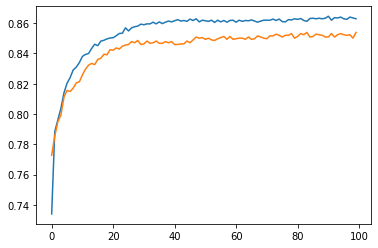

In [118]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

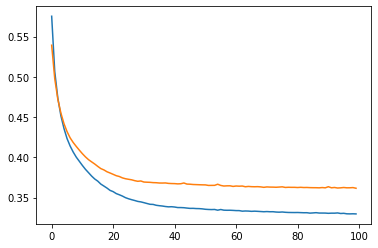

In [120]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

In [121]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred, Y_test)

NameError: name 'Y_pred' is not defined